# Title - Students and Their Brainrot reasons
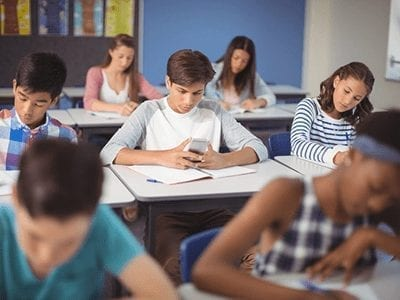


# Importing all the required Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from scipy.stats import zscore

# Loading the dataset

In [ ]:
sns.set(style='whitegrid')

df = pd.read_csv('a.csv')
print("Initial shape:", df.shape)
df = df.drop(columns=['student_id'])

print("\nData Types:\n", df.dtypes)

print("\nMissing values per column:\n", df.isnull().sum())


Initial shape: (1000, 16)

Data Types:
 age                                int64
gender                            object
study_hours_per_day              float64
social_media_hours               float64
netflix_hours                    float64
part_time_job                     object
attendance_percentage            float64
sleep_hours                      float64
diet_quality                      object
exercise_frequency                 int64
parental_education_level          object
internet_quality                  object
mental_health_rating               int64
extracurricular_participation     object
exam_score                       float64
dtype: object

Missing values per column:
 age                               0
gender                            0
study_hours_per_day               0
social_media_hours                0
netflix_hours                     0
part_time_job                     0
attendance_percentage             0
sleep_hours                       0
diet_quality  

# Handling Missing Values like Null and NaN


Missing values per column:
 age                               0
gender                            0
study_hours_per_day               0
social_media_hours                0
netflix_hours                     0
part_time_job                     0
attendance_percentage             0
sleep_hours                       0
diet_quality                      0
exercise_frequency                0
parental_education_level         91
internet_quality                  0
mental_health_rating              0
extracurricular_participation     0
exam_score                        0
dtype: int64


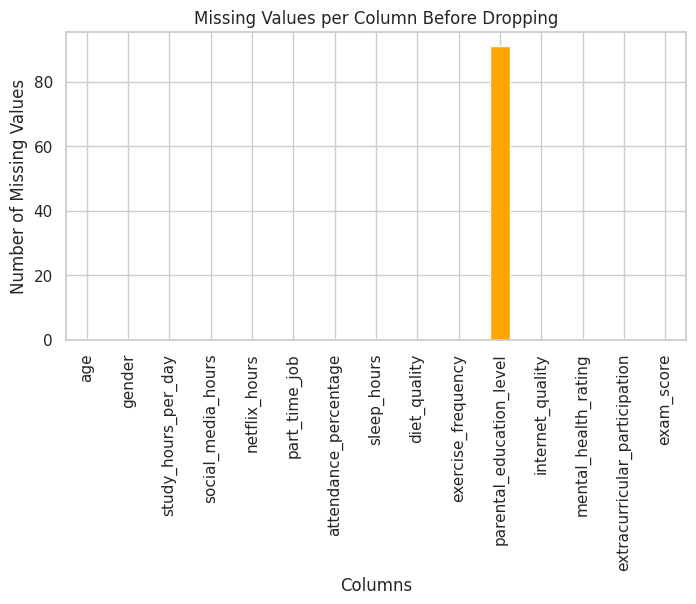

<ipython-input-54-5877269b79f5>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='parental_education_level', y='exam_score', palette='muted', estimator=np.mean)


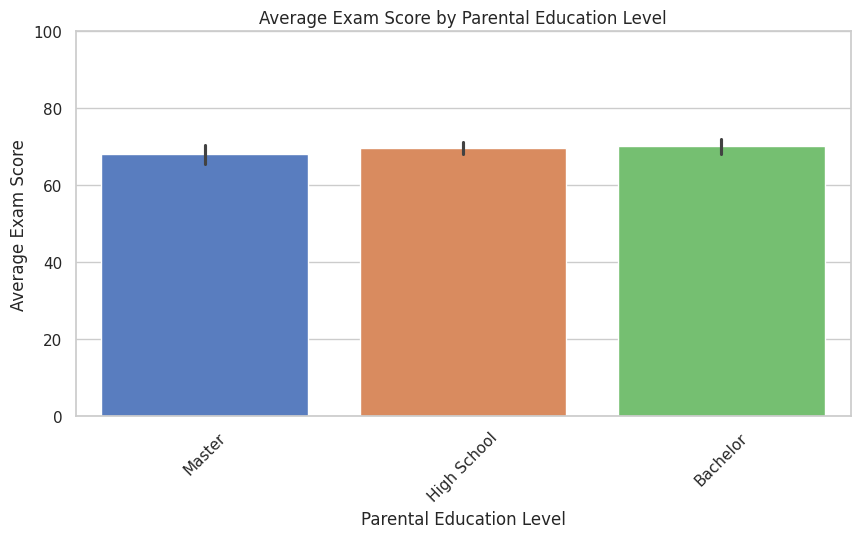

Correlation between 'parental_education_level' and 'exam_score': -0.04156098701211265

'parental_education_level' column dropped due to low correlation.

Shape of DataFrame after column drop (if applicable): (1000, 14)

Shape after dropping columns with missing values: (1000, 14)

Missing values per column:
 age                              0
gender                           0
study_hours_per_day              0
social_media_hours               0
netflix_hours                    0
part_time_job                    0
attendance_percentage            0
sleep_hours                      0
diet_quality                     0
exercise_frequency               0
internet_quality                 0
mental_health_rating             0
extracurricular_participation    0
exam_score                       0
dtype: int64


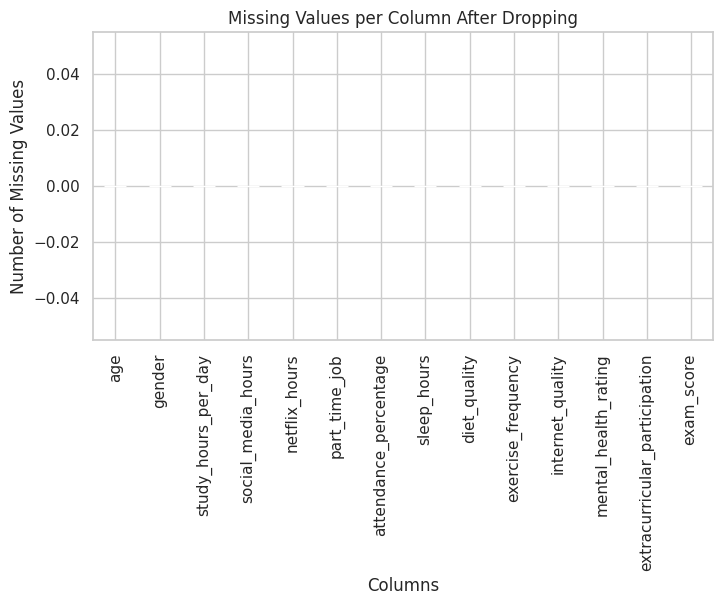

In [ ]:
print("\nMissing values per column:\n", df.isnull().sum())

plt.figure(figsize=(8, 4))
df.isnull().sum().plot.bar(color='orange')
plt.title("Missing Values per Column Before Dropping")
plt.ylabel("Number of Missing Values")
plt.xlabel("Columns")
plt.show()

df['exam_score'] = df['exam_score'].fillna(df['exam_score'].mean())
df['parental_education_level'] = df['parental_education_level'].fillna(df['parental_education_level'].mode()[0])

plt.figure(figsize=(10, 5))
sns.barplot(data=df, x='parental_education_level', y='exam_score', palette='muted', estimator=np.mean)
plt.title("Average Exam Score by Parental Education Level")
plt.xlabel("Parental Education Level")
plt.ylabel("Average Exam Score")
plt.xticks(rotation=45)
plt.ylim(0, 100)

plt.show()

correlation = df['parental_education_level'].astype('category').cat.codes.corr(df['exam_score'])
print(f"Correlation between 'parental_education_level' and 'exam_score': {correlation}")

if correlation < 0.1:
    df = df.drop(columns=['parental_education_level'])
    print("\n'parental_education_level' column dropped due to low correlation.")
else:
    print("\nThere is a moderate to high correlation, so we keep the 'parental_education_level' column.")

print("\nShape of DataFrame after column drop (if applicable):", df.shape)
print("\nShape after dropping columns with missing values:", df.shape)

print("\nMissing values per column:\n", df.isnull().sum())

plt.figure(figsize=(8, 4))
df.isnull().sum().plot.bar(color='green')
plt.title("Missing Values per Column After Dropping")
plt.ylabel("Number of Missing Values")
plt.xlabel("Columns")
plt.show()


# Removing Outliers using z score

In [ ]:
df_original = pd.read_csv('a.csv').drop(columns=['student_id'])
df_original = df_original.dropna()

numeric_cols = df_original.select_dtypes(include=[np.number]).columns.tolist()
z_scores = np.abs(zscore(df_original[numeric_cols]))
outlier_mask = (z_scores >= 3).any(axis=1)

outliers_removed = df_original[outlier_mask]
print(f"Total outliers removed: {outliers_removed.shape[0]}")
print(outliers_removed)
print("\nShape after dropping columns with missing values:", df.shape)


Total outliers removed: 8
     age  gender  study_hours_per_day  social_media_hours  netflix_hours  \
265   18  Female                  0.6                 3.1            3.0   
346   19    Male                  4.5                 6.0            2.2   
361   17    Male                  4.4                 6.1            0.0   
455   19    Male                  8.3                 3.3            2.6   
556   24  Female                  4.0                 3.3            5.4   
735   19    Male                  2.9                 7.2            2.9   
797   23    Male                  8.2                 2.2            1.5   
822   22  Female                  2.6                 3.4            5.3   

    part_time_job  attendance_percentage  sleep_hours diet_quality  \
265            No                   79.9          5.2         Good   
346           Yes                   95.3          7.6         Poor   
361            No                   92.6          5.1         Poor   
455      

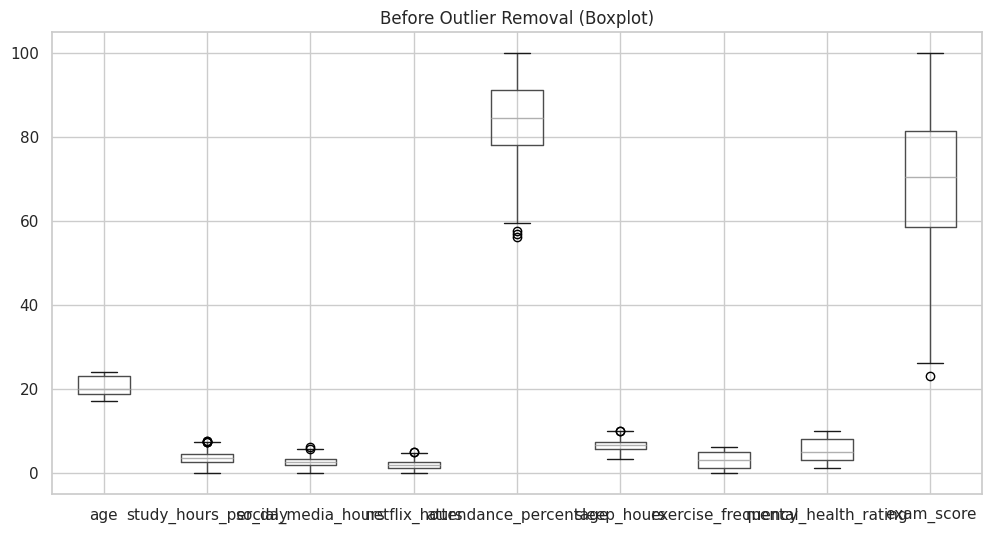


Outliers removed: 1


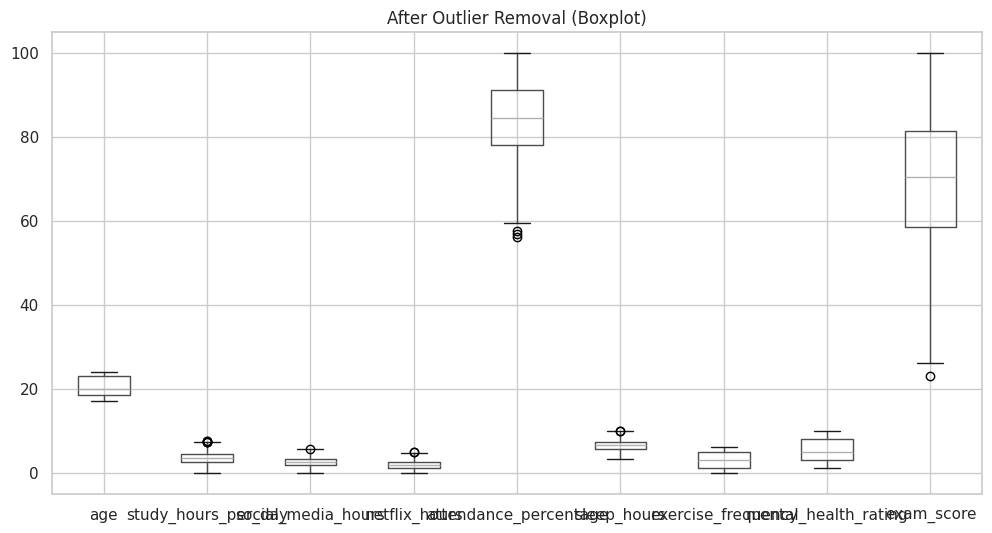

In [ ]:
plt.figure(figsize=(12, 6))
df.select_dtypes(include=np.number).boxplot()
plt.title("Before Outlier Removal (Boxplot)")
plt.show()

numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
before_rows = df.shape[0]
df = df[(np.abs(zscore(df[numeric_cols])) < 3).all(axis=1)]
after_rows = df.shape[0]
print(f"\nOutliers removed: {before_rows - after_rows}")

plt.figure(figsize=(12, 6))
df.select_dtypes(include=np.number).boxplot()
plt.title("After Outlier Removal (Boxplot)")
plt.show()

# Visualization

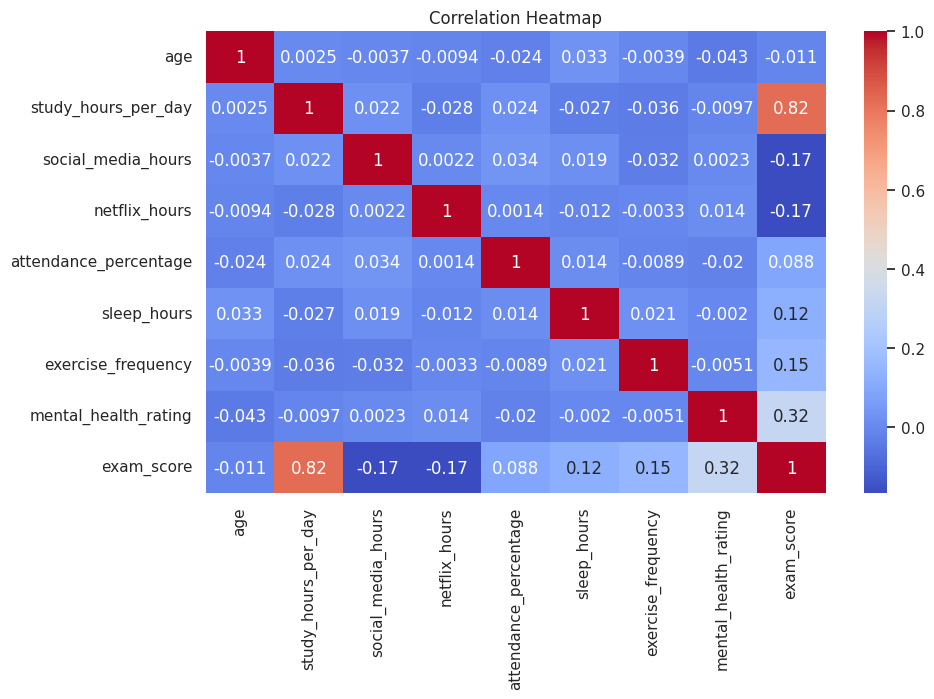

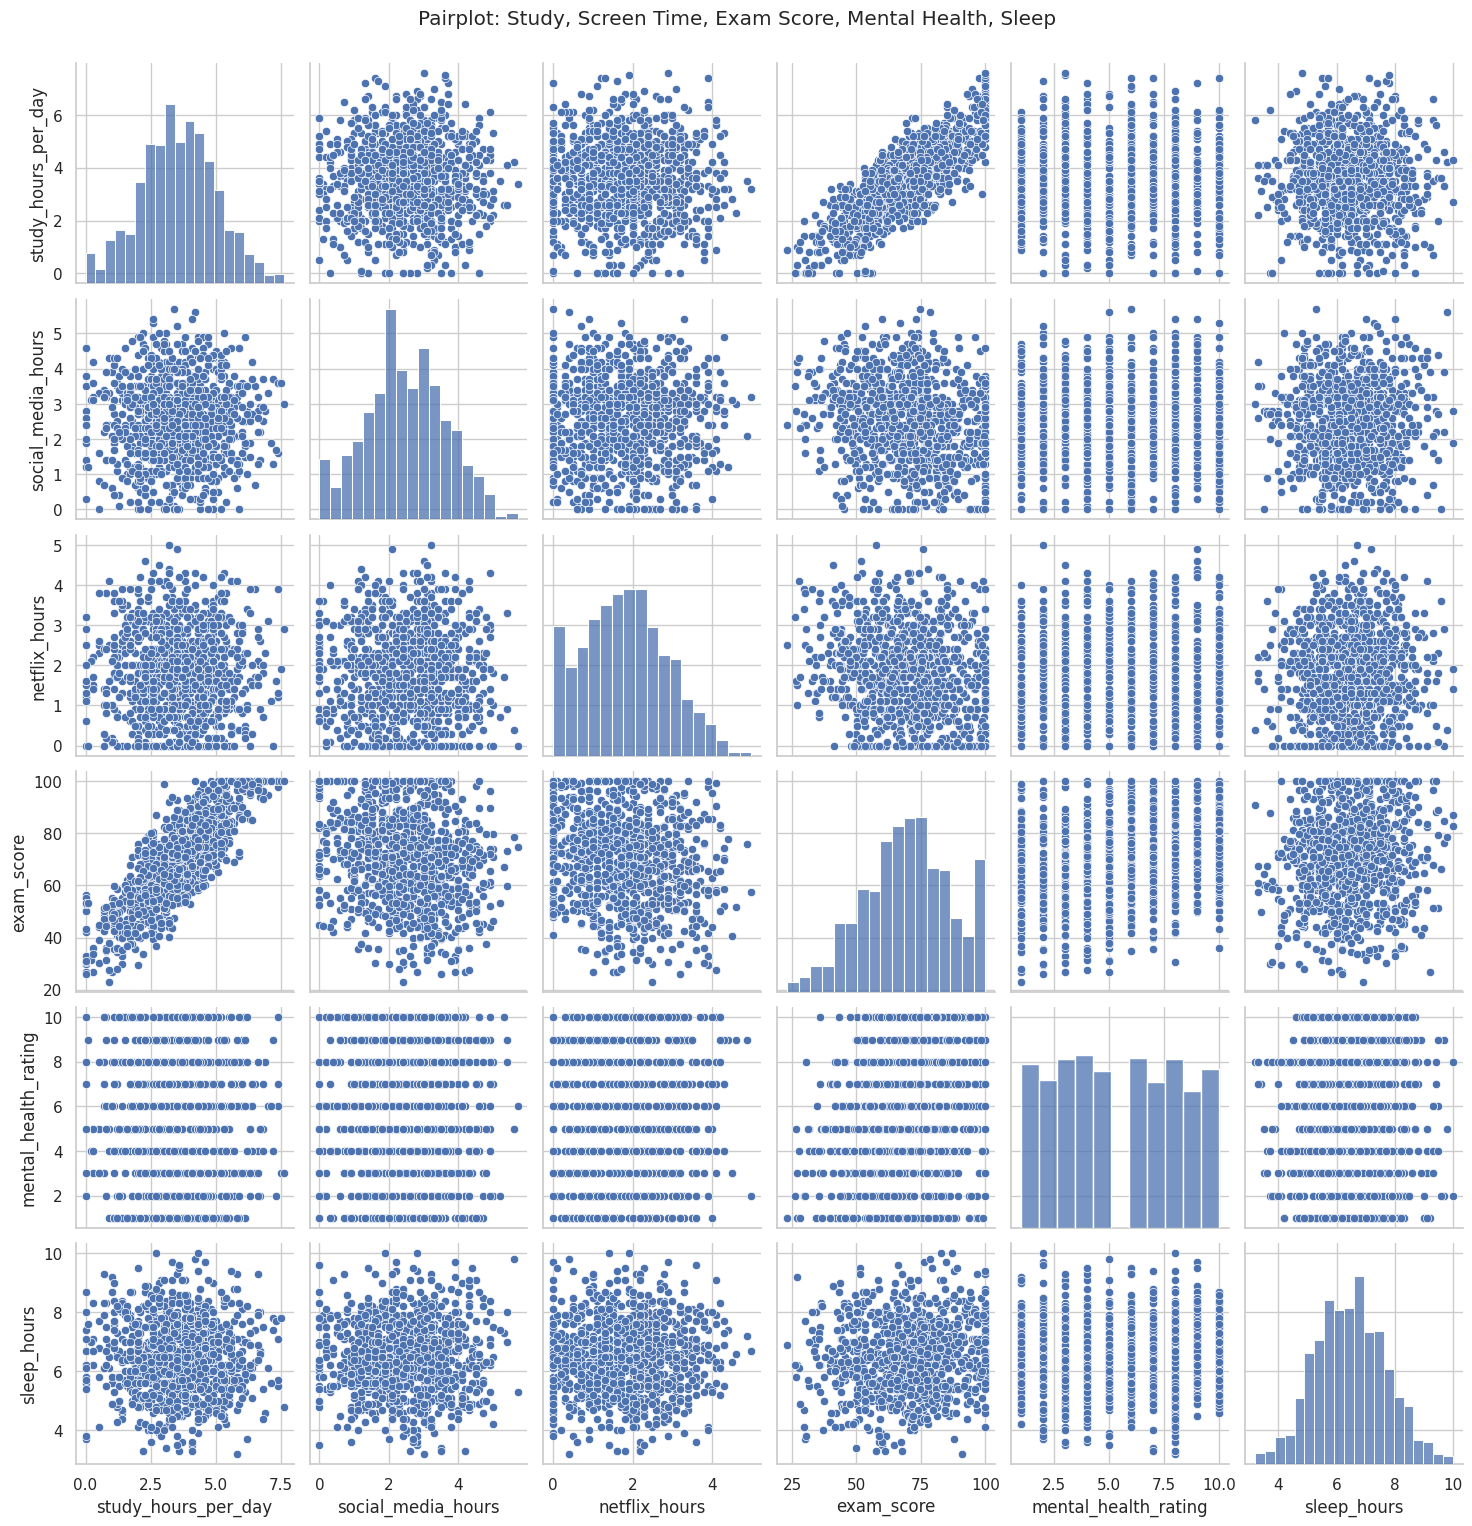

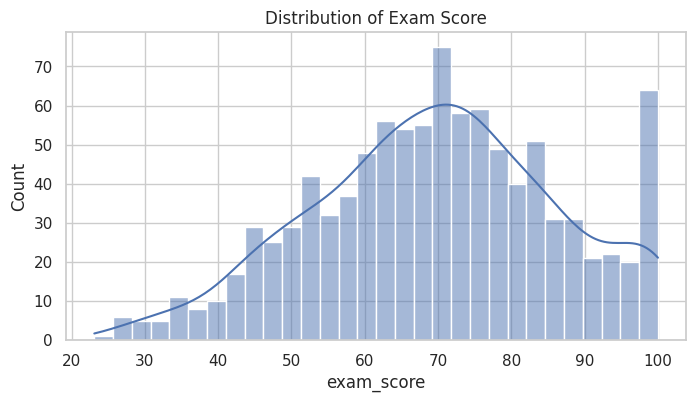

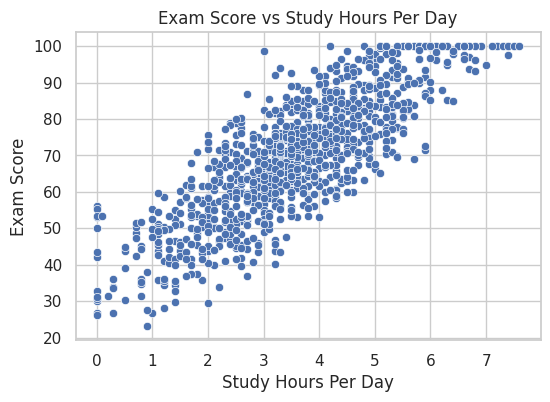

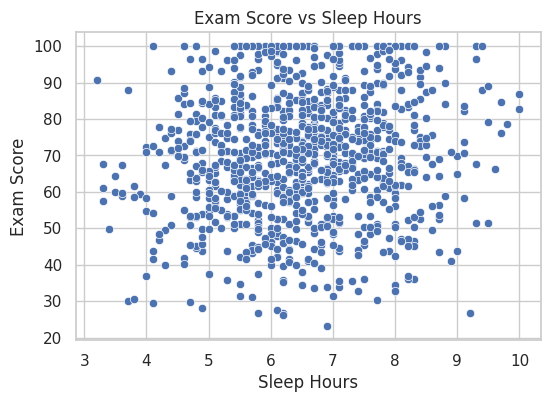

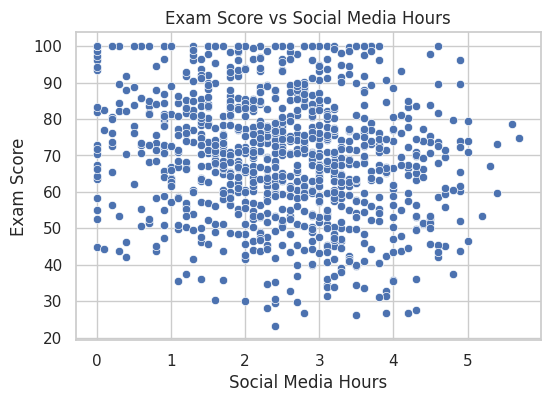

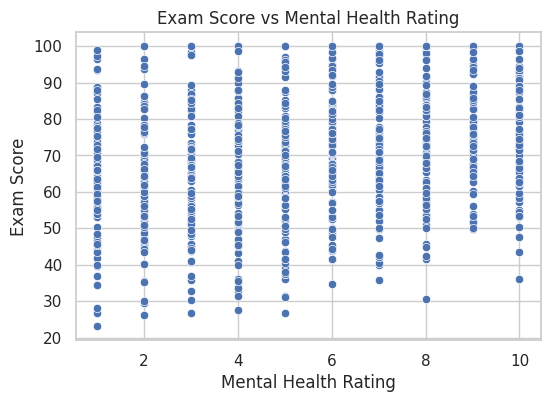

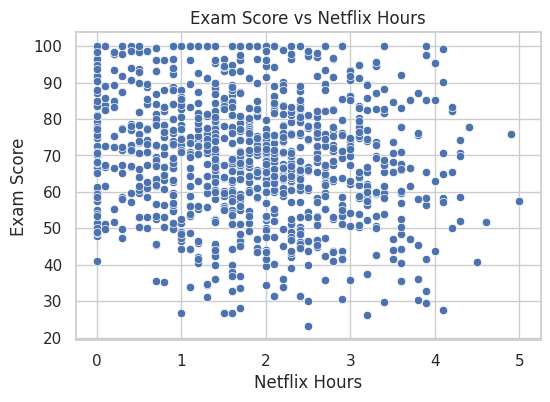

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

selected_columns = ['study_hours_per_day', 'social_media_hours','netflix_hours', 'exam_score', 'mental_health_rating', 'sleep_hours']
filtered_df = df[selected_columns].dropna()

sns.pairplot(filtered_df)
plt.suptitle("Pairplot: Study, Screen Time, Exam Score, Mental Health, Sleep", y=1.02)
plt.show()

plt.figure(figsize=(8, 4))
sns.histplot(df['exam_score'], bins=30, kde=True)
plt.title("Distribution of Exam Score")
plt.show()

features = ['study_hours_per_day', 'sleep_hours', 'social_media_hours', 'mental_health_rating', 'netflix_hours']
for feature in features:
    plt.figure(figsize=(6, 4))
    sns.scatterplot(data=df, x=feature, y='exam_score')
    plt.title(f"Exam Score vs {feature.replace('_', ' ').title()}")
    plt.xlabel(feature.replace('_', ' ').title())
    plt.ylabel("Exam Score")
    plt.show()

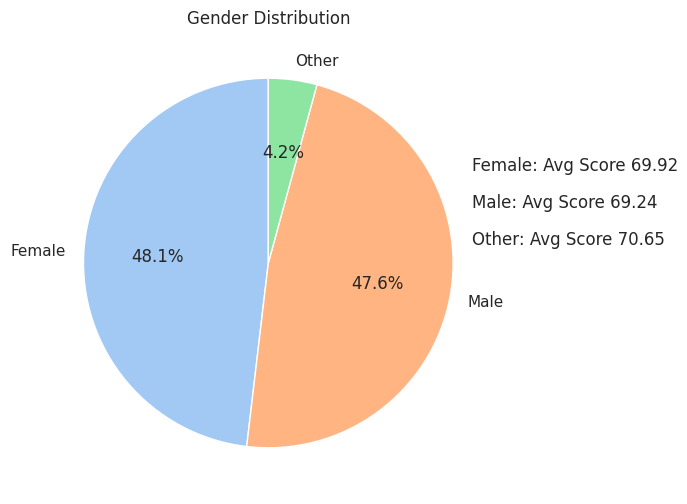

In [ ]:
avg_exam_score_per_gender = df.groupby('gender')['exam_score'].mean()

gender_counts = df['gender'].value_counts()

plt.figure(figsize=(6, 6))
gender_counts.plot.pie(autopct='%1.1f%%', colors=sns.color_palette("pastel"), startangle=90)
plt.title("Gender Distribution")

for i, gender in enumerate(gender_counts.index):
    plt.text(1.1, 0.5 - i * 0.2, f'{gender}: Avg Score {avg_exam_score_per_gender[gender]:.2f}', fontsize=12)

plt.ylabel("")
plt.show()


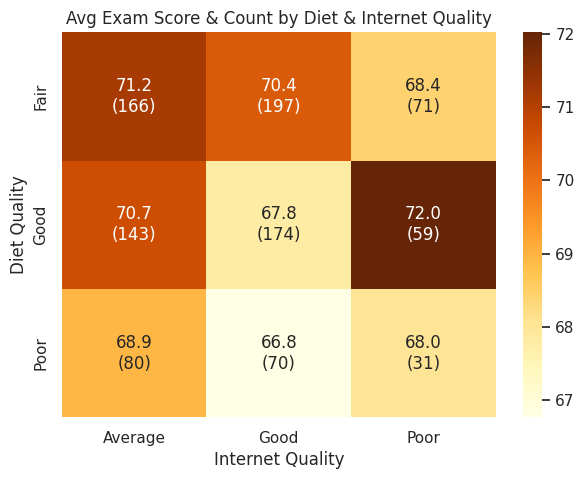

In [ ]:
avg_score = df.pivot_table(index='diet_quality', columns='internet_quality', values='exam_score', aggfunc='mean')
count = df.pivot_table(index='diet_quality', columns='internet_quality', values='exam_score', aggfunc='count')

annot = avg_score.round(1).astype(str) + "\n(" + count.astype(int).astype(str) + ")"

plt.figure(figsize=(7, 5))
sns.heatmap(avg_score, annot=annot, fmt='', cmap='YlOrBr')
plt.title("Avg Exam Score & Count by Diet & Internet Quality")
plt.xlabel("Internet Quality")
plt.ylabel("Diet Quality")
plt.show()


# Data preprocessing:onehot encoding and scaling

In [ ]:
df['screen_time_hours'] = df['netflix_hours'] + df['social_media_hours']

df.drop(['netflix_hours', 'social_media_hours'], axis=1, inplace=True)

X = df.drop('exam_score', axis=1)
y = df['exam_score']

categorical_cols = X.select_dtypes(include=['object']).columns.tolist()
numerical_cols = X.select_dtypes(include=[np.number]).columns.tolist()

print("\nCategorical Columns:", categorical_cols)
print("Numerical Columns:", numerical_cols)



Categorical Columns: ['gender', 'part_time_job', 'diet_quality', 'internet_quality', 'extracurricular_participation']
Numerical Columns: ['age', 'study_hours_per_day', 'attendance_percentage', 'sleep_hours', 'exercise_frequency', 'mental_health_rating', 'screen_time_hours']


In [ ]:
preprocessor = ColumnTransformer([
    ("onehot", OneHotEncoder(drop='first'), categorical_cols),
    ("scale", StandardScaler(), numerical_cols)
])

In [ ]:
transformed_data = preprocessor.fit_transform(df)

onehot_columns = preprocessor.transformers_[0][1].get_feature_names_out(categorical_cols)

all_columns = list(onehot_columns) + numerical_cols

transformed_df = pd.DataFrame(transformed_data, columns=all_columns)

print(transformed_df.head())




   gender_Male  gender_Other  part_time_job_Yes  diet_quality_Good  \
0          0.0           0.0                0.0                0.0   
1          0.0           0.0                0.0                1.0   
2          1.0           0.0                0.0                0.0   
3          0.0           0.0                0.0                0.0   
4          0.0           0.0                0.0                0.0   

   diet_quality_Poor  internet_quality_Good  internet_quality_Poor  \
0                0.0                    0.0                    0.0   
1                0.0                    0.0                    0.0   
2                1.0                    0.0                    1.0   
3                1.0                    1.0                    0.0   
4                0.0                    1.0                    0.0   

   extracurricular_participation_Yes       age  study_hours_per_day  \
0                                1.0  1.084788            -2.436169   
1               

# Spliting data for testing and training

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Linear Regression

In [ ]:
lr_pipeline = Pipeline(steps=[
    ("preprocess", preprocessor),
    ("model", LinearRegression())
])



In [ ]:
from xgboost import XGBRegressor

xgb_pipeline = Pipeline(steps=[
    ("preprocess", preprocessor),
    ("model", XGBRegressor(n_estimators=100, random_state=42))
])


# Random Forest

In [ ]:
rf_pipeline = Pipeline(steps=[
    ("preprocess", preprocessor),
    ("model", RandomForestRegressor(n_estimators=100, random_state=42))
])

models = {
    "Linear Regression": lr_pipeline,
    "Random Forest": rf_pipeline,
    "XGBoost": xgb_pipeline
}


# Function for Evaluation

In [ ]:
def evaluate_model(name, pipeline, X_test, y_test):
    y_pred = pipeline.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
    tolerance = 0.10
    accuracy_within_10 = np.mean(np.abs((y_test - y_pred) / y_test) < tolerance) * 100

    print(f"\n{name} Results:")
    print("MAE:", round(mae, 2))
    print("MSE:", round(mse, 2))
    print("RMSE:", round(rmse, 2))
    print("R² Score:", round(r2, 4))
    print("MAPE (%):", round(mape, 2))
    print(f"Accuracy within ±10%: {round(accuracy_within_10, 2)}%")

    # Plot predictions vs actual
    plt.figure(figsize=(6, 4))
    sns.scatterplot(x=y_test, y=y_pred)
    plt.xlabel("Actual Exam Score")
    plt.ylabel("Predicted Exam Score")
    plt.title(f"{name}: Actual vs Predicted")
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
    plt.show()

# Results and Observations


Linear Regression Results:
MAE: 4.05
MSE: 24.8
RMSE: 4.98
R² Score: 0.9115
MAPE (%): 6.34
Accuracy within ±10%: 82.91%


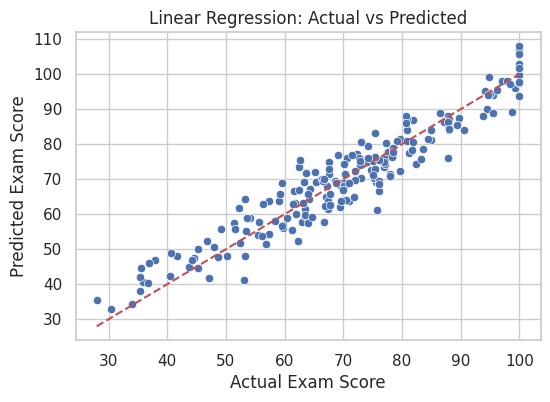


Random Forest Results:
MAE: 4.87
MSE: 37.2
RMSE: 6.1
R² Score: 0.8673
MAPE (%): 7.77
Accuracy within ±10%: 74.37%


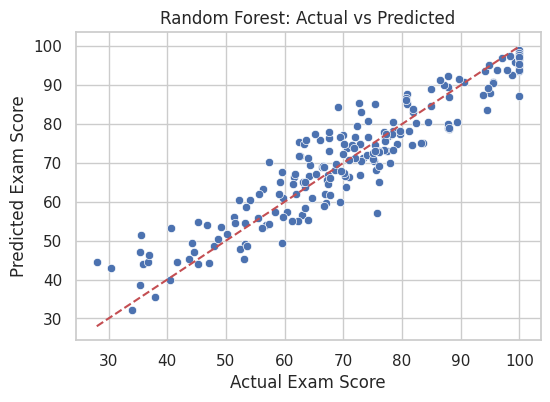


XGBoost Results:
MAE: 5.07
MSE: 41.77
RMSE: 6.46
R² Score: 0.851
MAPE (%): 8.09
Accuracy within ±10%: 69.85%


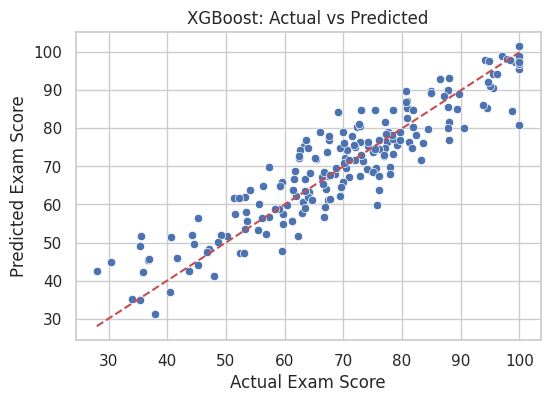

In [ ]:
for name, model in models.items():
    model.fit(X_train, y_train)
    evaluate_model(name, model, X_test, y_test)

In [ ]:
best_model = models["Linear Regression"]

print("\nEnter the following details for prediction:")
user_input = {}

for col in categorical_cols + numerical_cols:
    if col in categorical_cols:
        user_input[col] = input(f"{col} (categorical): ")
    else:
        user_input[col] = float(input(f"{col} (numeric): "))

user_df = pd.DataFrame([user_input])

predicted_score = best_model.predict(user_df)
predicted_score_value = float(np.clip(predicted_score[0], 0, 100))
print(f"\n📘 Predicted Exam Score: {predicted_score_value:.2f}/100.00")




Enter the following details for prediction:
gender (categorical): Male
part_time_job (categorical): No
diet_quality (categorical): Good
internet_quality (categorical): Good
extracurricular_participation (categorical): Yes
age (numeric): 20
study_hours_per_day (numeric): 2
attendance_percentage (numeric): 50
sleep_hours (numeric): 10
exercise_frequency (numeric): 2
mental_health_rating (numeric): 5
screen_time_hours (numeric): 8

📘 Predicted Exam Score: 44.17/100.00


In [ ]:
print("\n📊 Average Values from Dataset:")
for key, value in average_values.items():
    if isinstance(value, (int, float)):
        print(f"{key.replace('_', ' ').title()}: {value:.2f}")



📊 Average Values from Dataset:
Age: 20.50
Study Hours Per Day: 3.54
Attendance Percentage: 84.12
Sleep Hours: 6.47
Exercise Frequency: 3.05
Mental Health Rating: 5.44
Screen Time Hours: 4.30


In [ ]:
print("\n Suggestions for Improving Exam Score:")
print("(Your value vs. average from dataset)\n")

suggestions = []

study_avg = average_values.get("study_hours_per_day", 3.54)
screen_avg = average_values.get("screen_time_hours", 4.30)
attendance_avg = average_values.get("attendance_percentage", 84.12)
sleep_avg = average_values.get("sleep_hours", 6.47)
exercise_avg = average_values.get("exercise_frequency", 3.05)
mental_health_avg = average_values.get("mental_health_rating", 5.44)

def compare_and_suggest(col, direction="higher", msg=""):
    user_val = user_input.get(col, None)
    avg_val = average_values.get(col, None)
    if user_val is None or avg_val is None:
        return
    print(f"{col.replace('_', ' ').title()}: {user_val} vs Avg {avg_val:.2f}")
    if direction == "higher" and user_val < avg_val:
        suggestions.append(f"- {msg} (Your value: {user_val}, Avg: {avg_val:.1f})")
    elif direction == "lower" and user_val > avg_val:
        suggestions.append(f"- {msg} (Your value: {user_val}, Avg: {avg_val:.1f})")

compare_and_suggest("study_hours_per_day", "higher", "Increase your study hours to improve learning.")
compare_and_suggest("social_media_hours", "lower", "Reduce social media time to stay more focused.")
compare_and_suggest("netflix_hours", "lower", "Limit Netflix/binge-watching to gain time for study or rest.")
compare_and_suggest("attendance_percentage", "higher", "Attend more classes to improve understanding.")
compare_and_suggest("sleep_hours", "higher", "Sleep more to help with memory and concentration.")
compare_and_suggest("exercise_frequency", "higher", "Exercise regularly to maintain physical and mental health.")
compare_and_suggest("mental_health_rating", "higher", "Take care of your mental well-being.")

print("\n📝 Suggestions:")
if not suggestions:
    print("✅ Your habits are well aligned with top-performing students. Great job!")
else:
    for suggestion in suggestions:
        print(suggestion)



 Suggestions for Improving Exam Score:
(Your value vs. average from dataset)

Study Hours Per Day: 2.0 vs Avg 3.54
Attendance Percentage: 50.0 vs Avg 84.12
Sleep Hours: 10.0 vs Avg 6.47
Exercise Frequency: 2.0 vs Avg 3.05
Mental Health Rating: 5.0 vs Avg 5.44

📝 Suggestions:
- Increase your study hours to improve learning. (Your value: 2.0, Avg: 3.5)
- Attend more classes to improve understanding. (Your value: 50.0, Avg: 84.1)
- Exercise regularly to maintain physical and mental health. (Your value: 2.0, Avg: 3.0)
- Take care of your mental well-being. (Your value: 5.0, Avg: 5.4)
